In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [61]:
# Read the excel file
df = pd.read_csv('./data/IMF_Italy_US.csv')

# convert the date column to datetime, ymd format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# explore the data
df.head()

,date,industrial_production_index,industrial_production_1m_growth_rate,industrial_production_12m_growth_rate,nominal_er_nat_currency_per_usd,nominal_er_growth_rate,real_er_nat_currency_per_usd,real_er_growth_rate,reserves_in_usd_italy,reserves_index_italy,reserves_in_usd_usa,reserves_index_usa,cpi_italy,inflation_rate_italy,cpi_usa,inflation_rate_usa
0,1960-01-01,31.134278,NaN,NaN,621.118012,NaN,2014.007182,NaN,2989.5,100.000000,21478.1,100.000000,4.143942,NaN,13.436946,NaN
1,1960-02-01,32.602650,4.716258,NaN,621.118012,0.000000,2024.392651,0.515662,2958.5,98.963037,21395.7,99.616353,4.136754,-0.173471,13.482806,0.341297
2,1960-03-01,33.712883,3.405346,NaN,620.600000,-0.083400,2026.224791,0.090503,2923.5,97.792273,21344.7,99.378902,4.129566,-0.173746,13.482806,0.000000
3,1960-04-01,33.891953,0.531161,NaN,625.000001,0.708991,2049.315269,1.139581,2959.5,98.996488,21278.0,99.068353,4.125971,-0.087050,13.528666,0.340136
4,1960-05-01,34.632109,2.183868,NaN,625.000001,0.000000,2045.751037,-0.173923,2970.5,99.364442,21234.3,98.864890,4.133160,0.174226,13.528666,0.000000


## Nominal ER Growth Rate (DONE)

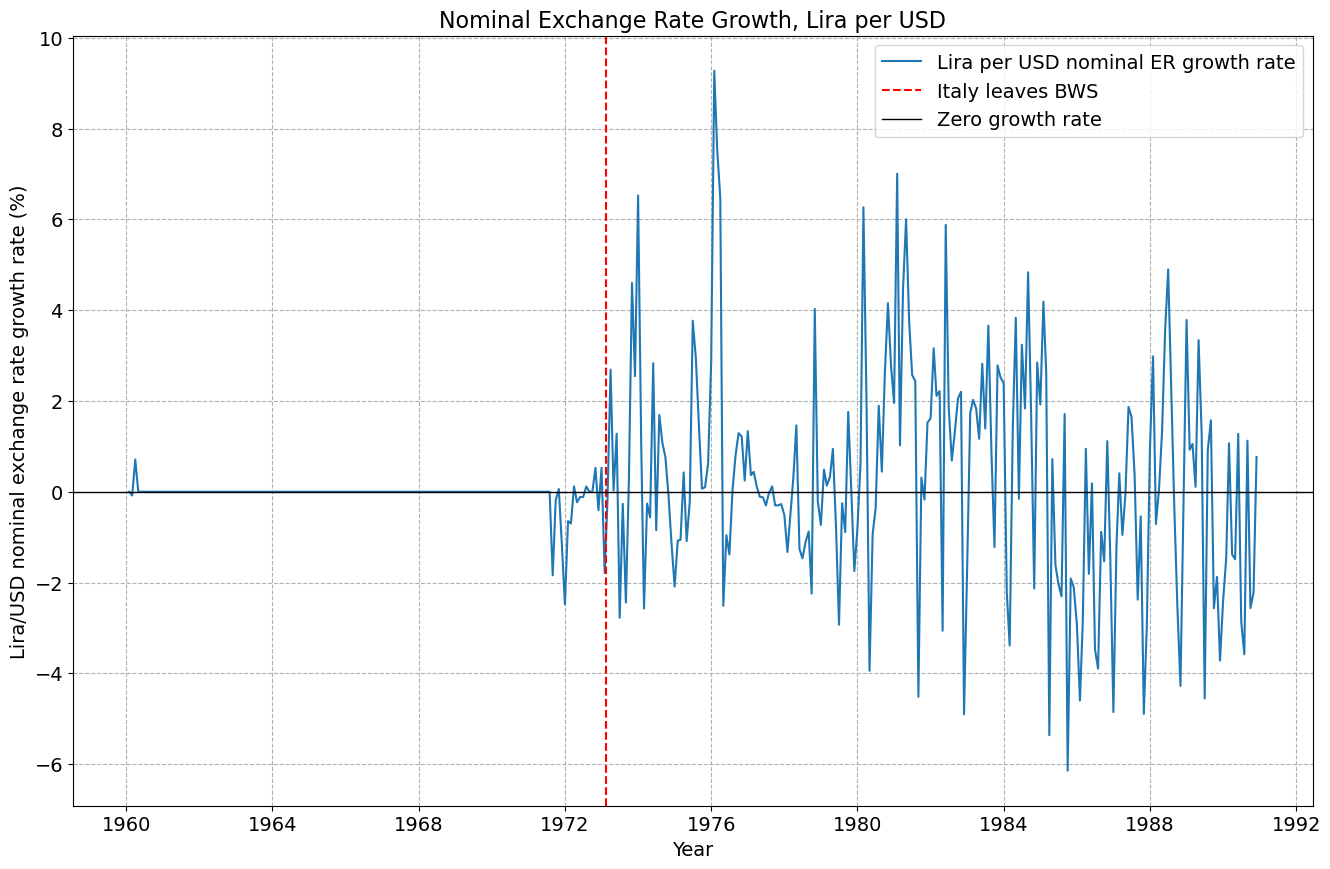

In [62]:
# Plot a time series graph of the monthly growth in nominal exchange rates of your country, versus the US dollar.
plt.plot(df['date'],df['nominal_er_growth_rate'], label='Lira per USD nominal ER growth rate')
plt.grid(True, which='both', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Lira/USD nominal exchange rate growth rate (%)', fontsize=14)
plt.title('Nominal Exchange Rate Growth, Lira per USD', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System and show the label
plt.axvline(x=pd.to_datetime("1973-02-13"), color='r', linestyle='--', label='Italy leaves BWS')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, label='Zero growth rate')
plt.legend(fontsize=14)
# save the graph
plt.savefig('./images/nominal_er_growth_rate.png')

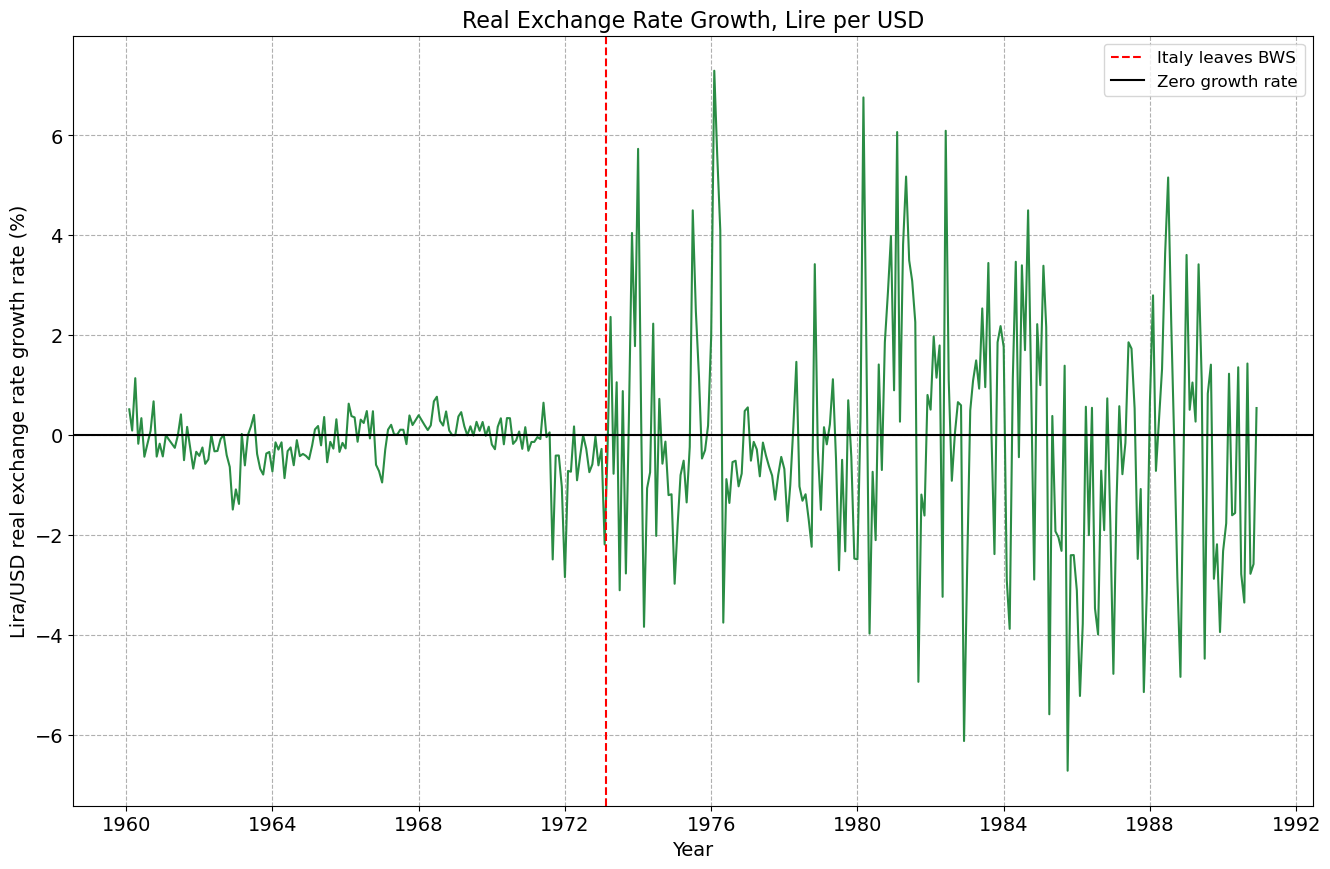

In [63]:
# Plot a time series graph of the monthly growth in real exchange rates of your country, versus the US dollar.
plt.plot(df['date'],df['real_er_growth_rate'], color='#2a8c44')
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Lira/USD real exchange rate growth rate (%)', fontsize=14)
plt.title('Real Exchange Rate Growth, Lire per USD', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System
plt.axvline(x=pd.to_datetime("1973-02-13"), color='r', linestyle='--', label='Italy leaves BWS')
# draw a horizontal line at exchange rate growth rate of 0
plt.axhline(y=0, color='black', linestyle='-', label='Zero growth rate')

plt.legend(fontsize=12)
# save the graph
plt.savefig('./images/real_er_growth_rate.png')

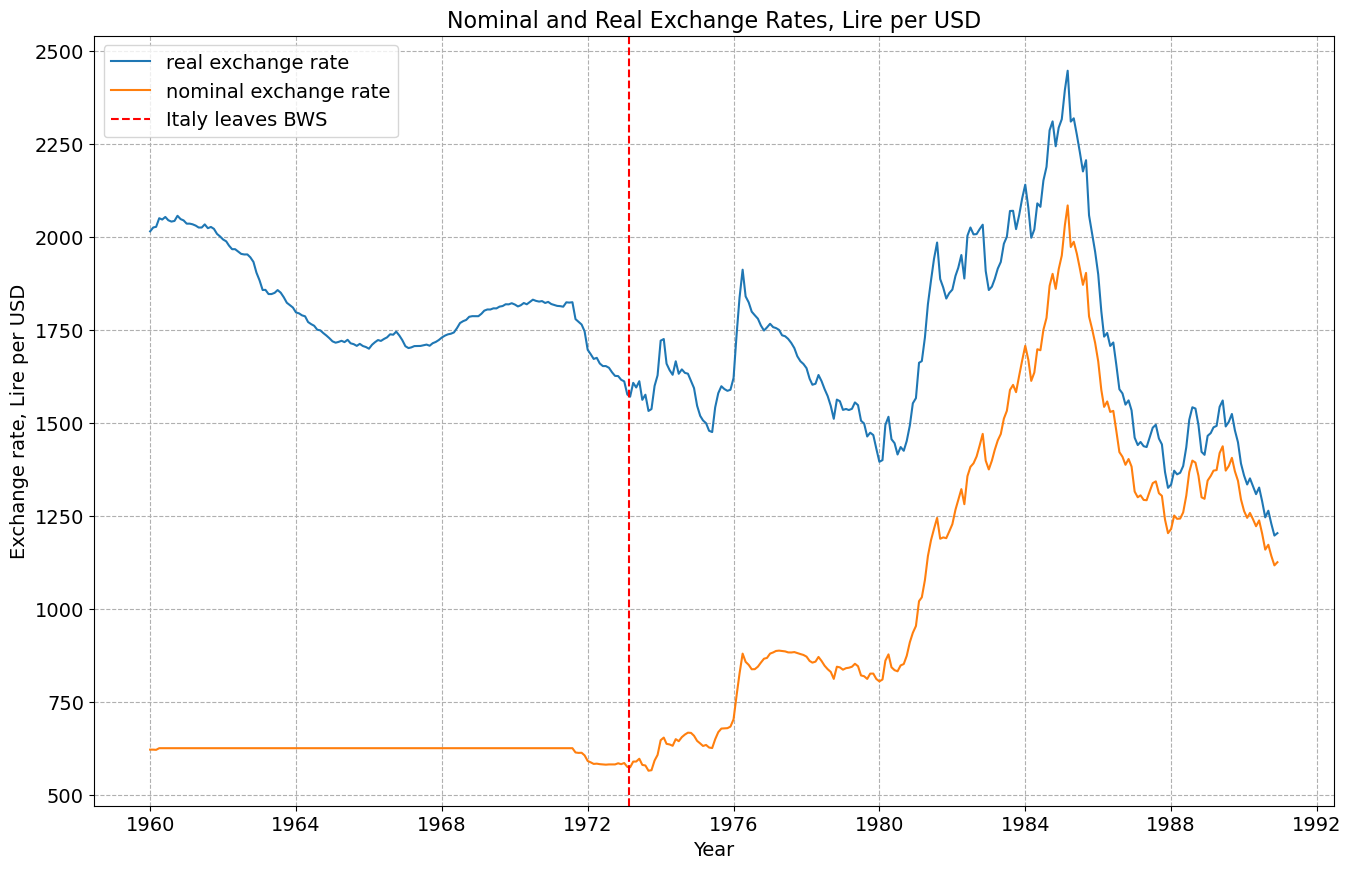

In [64]:
# Plot a time series graph of the real exchange rate level of your country, versus the US dollar.
plt.plot(df['date'],df['real_er_nat_currency_per_usd'], label='real exchange rate')
plt.plot(df['date'],df['nominal_er_nat_currency_per_usd'], label='nominal exchange rate')
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Exchange rate, Lire per USD', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Nominal and Real Exchange Rates, Lire per USD', fontsize=16)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System
plt.axvline(x=pd.to_datetime("1973-02-13"), color='r', linestyle='--', label='Italy leaves BWS')
plt.legend(fontsize=14)
plt.savefig('./images/real_nominal_er.png')

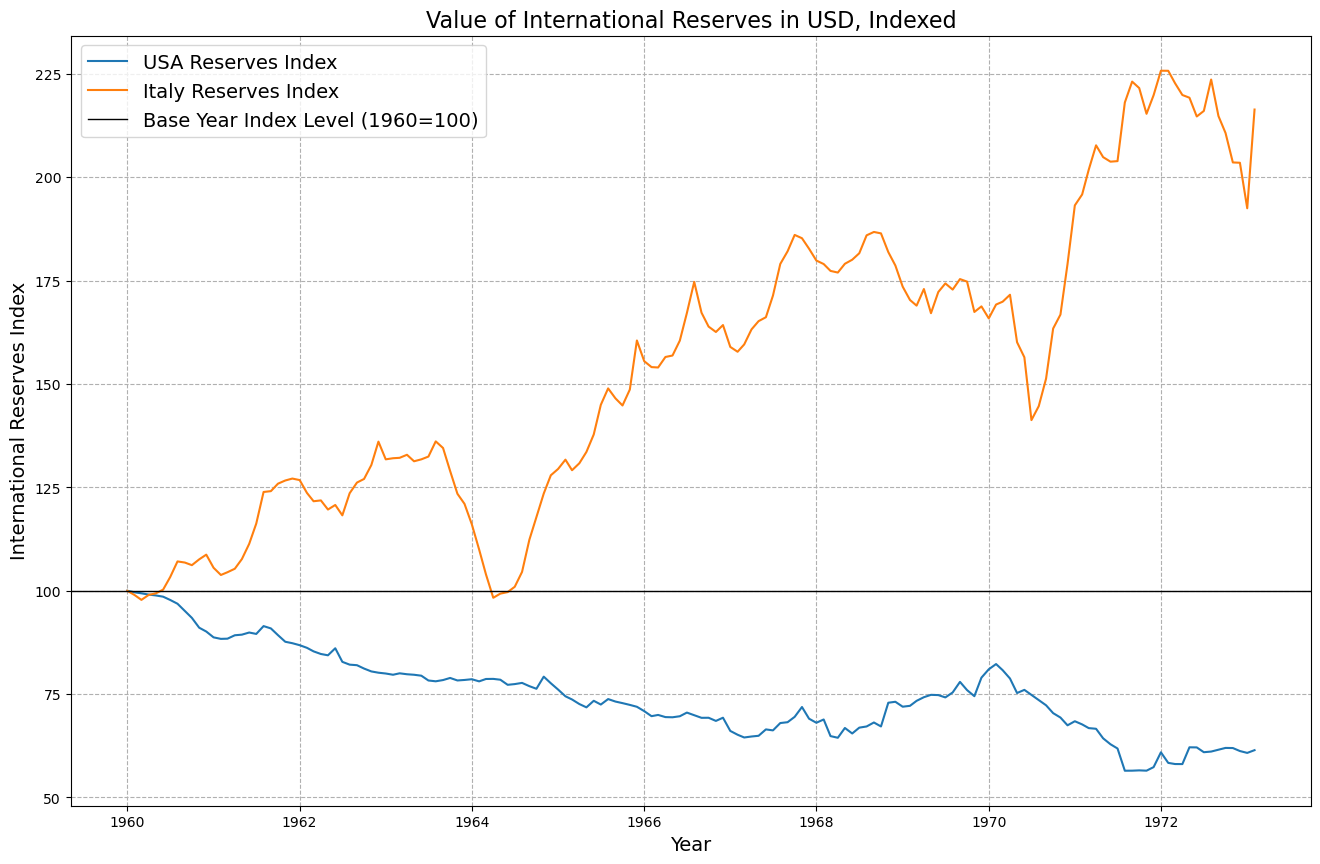

In [70]:
# Plot a time series graph of the monthly indexed value of international reserves of Italy and the monthly indexed value of international reserves of the US from January 1960 until the exit of the US from Bretton Woods (August 1971).git/
# filter the dataframe
filtered_df = df[(df['date'] >= '1960-01-01') & (df['date'] <= '1973-02-13')]
plt.plot(filtered_df['date'], filtered_df['reserves_index_usa'], label='USA Reserves Index')
plt.plot(filtered_df['date'], filtered_df['reserves_index_italy'], label='Italy Reserves Index')
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('International Reserves Index', fontsize=14)
plt.title('Value of International Reserves in USD, Indexed', fontsize=16)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System
plt.axhline(y=100, color='black', linestyle='-', linewidth=1, label='Base Year Index Level (1960=100)')
plt.legend(fontsize=14)
plt.savefig('./images/international_reserves_index.png')